In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import os
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from ML_package.utils import ML_Utils
base_controller = ML_Utils()

2025-06-11 05:46:42,488 - INFO - ML_Base_Controller initialized.


In [3]:
data = pd.read_csv(os.path.join(r"D:\Code for tutorials\Machine Learning\datasets\Heart Disease\heart.xls"))
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
data['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [5]:
data.columns.to_list()

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

2025-06-11 05:46:42,715 - INFO - Generating pairplot for features: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'] with label: target


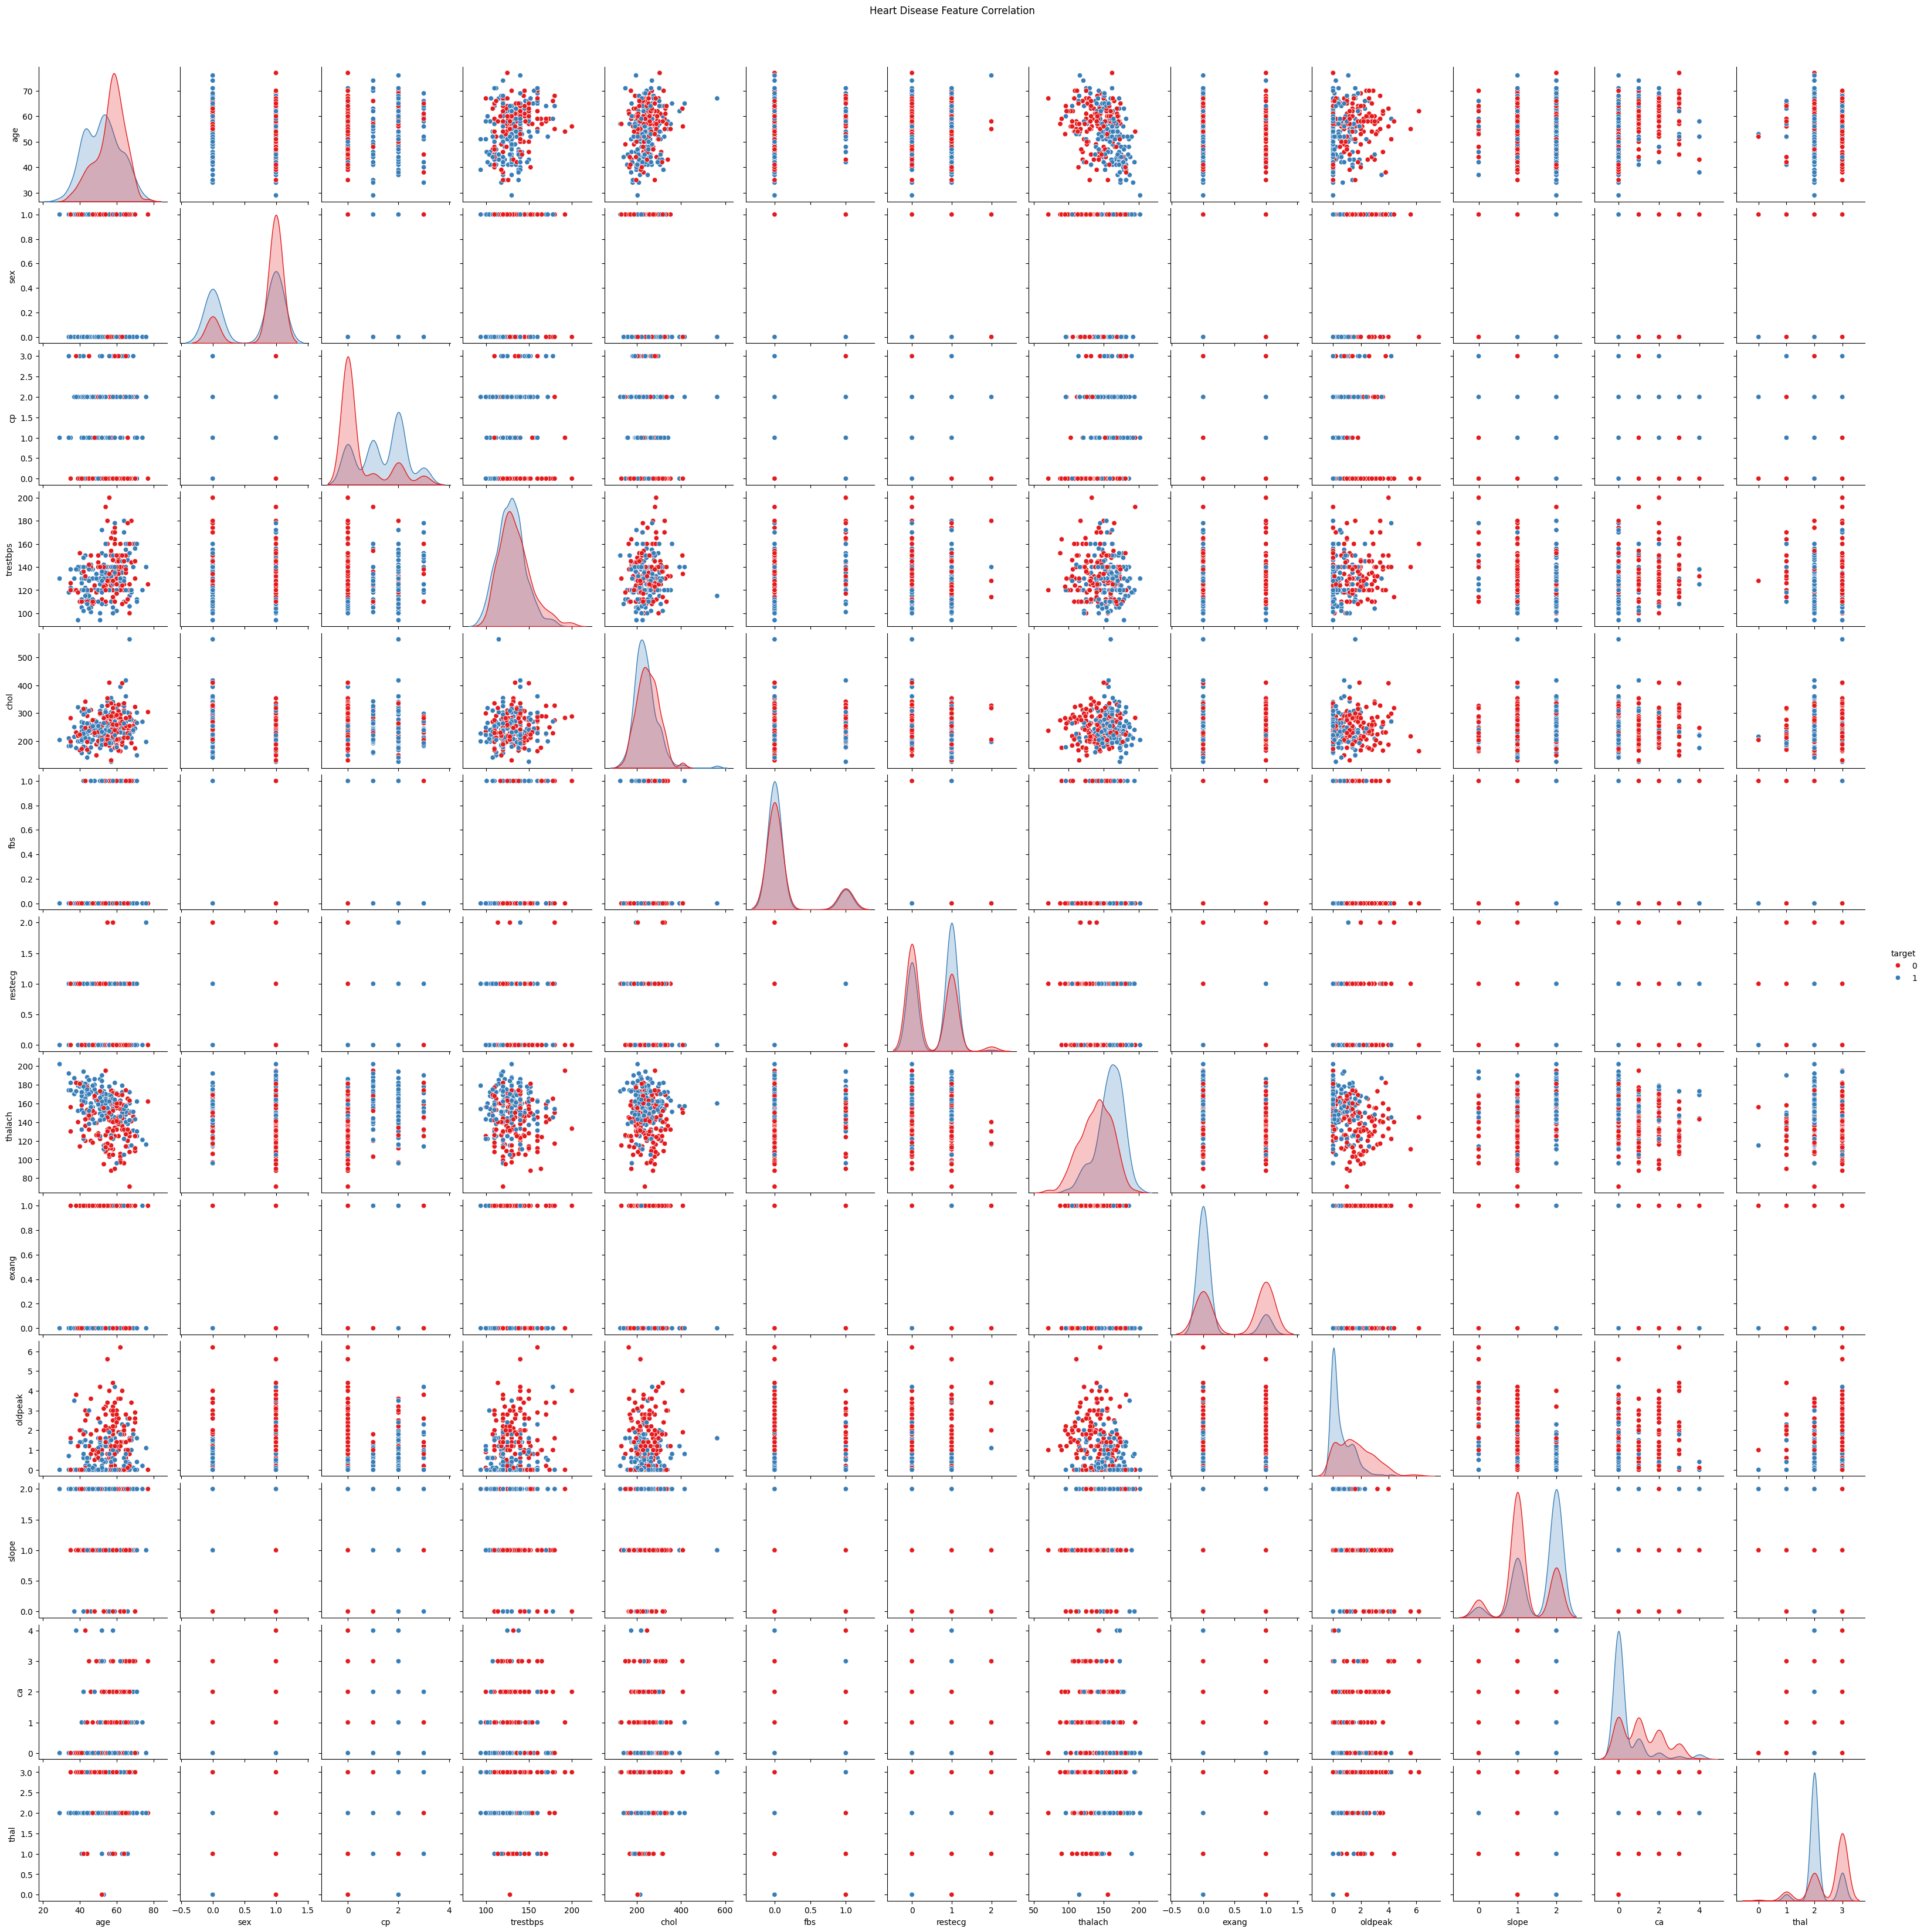

<Figure size 1000x600 with 0 Axes>

In [6]:
selected_features = ['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

base_controller.feature_correlation(selected_features=selected_features,data=data,label='target',title='Heart Disease Feature Correlation')

2025-06-11 05:47:28,129 - INFO - Generating correlation heatmap for label: target


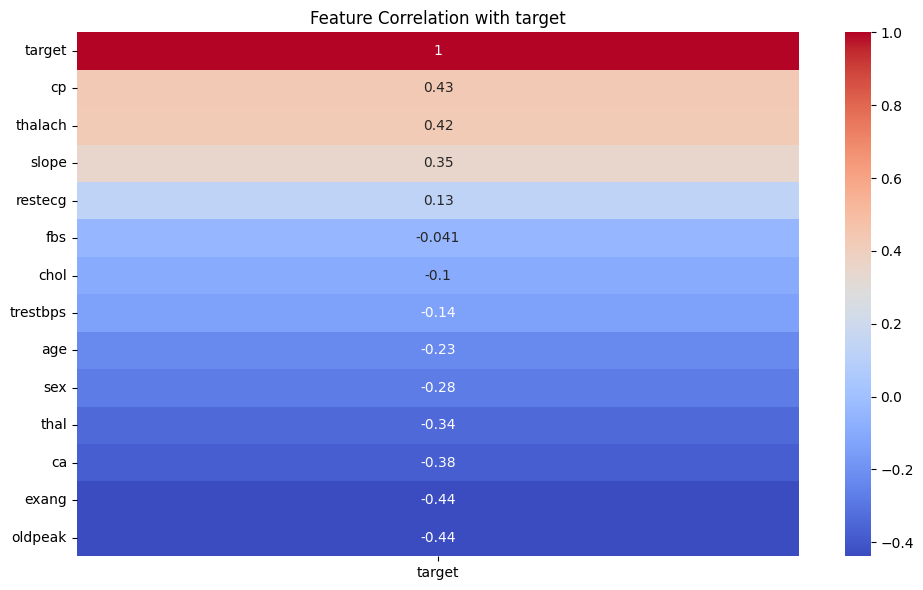

In [7]:
X = data.drop('target', axis=1)
y = data['target']

# data_scaled = base_controller.feature_scaling(data)
# data_scaled['target'] = y
base_controller.feature_impact(data,"target")

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(820, 13)
(205, 13)
(820,)
(205,)


In [9]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
X_train_scaled = base_controller.feature_scaling(X_train)
X_test_scaled = base_controller.feature_scaling(X_test)

In [11]:
y_pred,model,accuracy=base_controller.fit_model(LogisticRegression(),X_train_scaled,y_train,X_test_scaled,y_test,)

2025-06-11 05:47:28,675 - INFO - Fitting model: 
2025-06-11 05:47:28,699 - INFO - [Classification] Model:  - Accuracy: 78.0488%


Model:  - Score: 0.7805


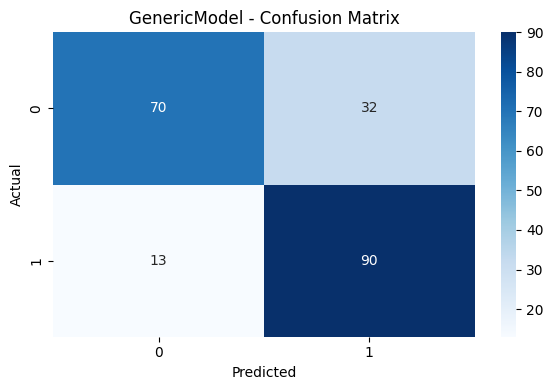

2025-06-11 05:47:28,988 - INFO - Evaluation - GenericModel
2025-06-11 05:47:28,989 - INFO - type: Classifier
2025-06-11 05:47:28,989 - INFO - accuracy: 0.7804878048780488
2025-06-11 05:47:28,990 - INFO - precision: 0.7902814777703379
2025-06-11 05:47:28,992 - INFO - recall: 0.7804878048780488
2025-06-11 05:47:28,994 - INFO - f1_score: 0.7784838497033619
2025-06-11 05:47:28,995 - INFO - mean_squared_error: 0.21951219512195122
2025-06-11 05:47:28,995 - INFO - mean_absolute_error: 0.21951219512195122
2025-06-11 05:47:28,996 - INFO - classification_report:               precision    recall  f1-score   support

           0       0.84      0.69      0.76       102
           1       0.74      0.87      0.80       103

    accuracy                           0.78       205
   macro avg       0.79      0.78      0.78       205
weighted avg       0.79      0.78      0.78       205



{'type': 'Classifier',
 'accuracy': 0.7804878048780488,
 'precision': 0.7902814777703379,
 'recall': 0.7804878048780488,
 'f1_score': 0.7784838497033619,
 'mean_squared_error': 0.21951219512195122,
 'mean_absolute_error': 0.21951219512195122,
 'classification_report_dict': {'0': {'precision': 0.8433734939759037,
   'recall': 0.6862745098039216,
   'f1-score': 0.7567567567567568,
   'support': 102.0},
  '1': {'precision': 0.7377049180327869,
   'recall': 0.8737864077669902,
   'f1-score': 0.8,
   'support': 103.0},
  'accuracy': 0.7804878048780488,
  'macro avg': {'precision': 0.7905392060043452,
   'recall': 0.7800304587854558,
   'f1-score': 0.7783783783783784,
   'support': 205.0},
  'weighted avg': {'precision': 0.7902814777703379,
   'recall': 0.7804878048780488,
   'f1-score': 0.7784838497033619,
   'support': 205.0}},
 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.84      0.69      0.76       102\n           1       0.74  

In [12]:
result = base_controller.evaluate_model(y_test,y_pred,LogisticRegression(),confusion_matrix_plot=True)
result

In [13]:
y_pred,model,accuracy=base_controller.fit_model(RandomForestClassifier(),X_train_scaled,y_train,X_test_scaled,y_test,)

2025-06-11 05:47:29,028 - INFO - Fitting model: 
2025-06-11 05:47:29,308 - INFO - [Classification] Model:  - Accuracy: 98.5366%


Model:  - Score: 0.9854


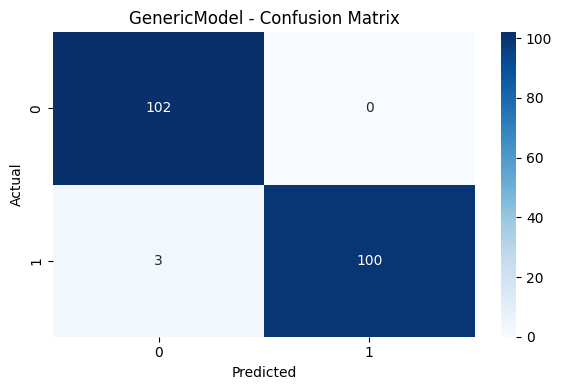

2025-06-11 05:47:29,617 - INFO - Evaluation - GenericModel
2025-06-11 05:47:29,619 - INFO - type: Classifier
2025-06-11 05:47:29,621 - INFO - accuracy: 0.9853658536585366
2025-06-11 05:47:29,622 - INFO - precision: 0.9857839721254356
2025-06-11 05:47:29,623 - INFO - recall: 0.9853658536585366
2025-06-11 05:47:29,624 - INFO - f1_score: 0.9853637641109759
2025-06-11 05:47:29,625 - INFO - mean_squared_error: 0.014634146341463415
2025-06-11 05:47:29,627 - INFO - mean_absolute_error: 0.014634146341463415
2025-06-11 05:47:29,629 - INFO - classification_report:               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [14]:
result=base_controller.evaluate_model(y_test,y_pred,RandomForestClassifier(),confusion_matrix_plot=True)

In [15]:
y_pred,model,accuracy=base_controller.fit_model(XGBClassifier(  n_estimators=100,
    max_depth=20,
    learning_rate=0.8,
    eval_metric='logloss',
    random_state=42),X_train_scaled,y_train,X_test_scaled,y_test)

2025-06-11 05:47:29,652 - INFO - Fitting model: 
2025-06-11 05:47:29,747 - INFO - [Classification] Model:  - Accuracy: 78.5366%


Model:  - Score: 0.7854


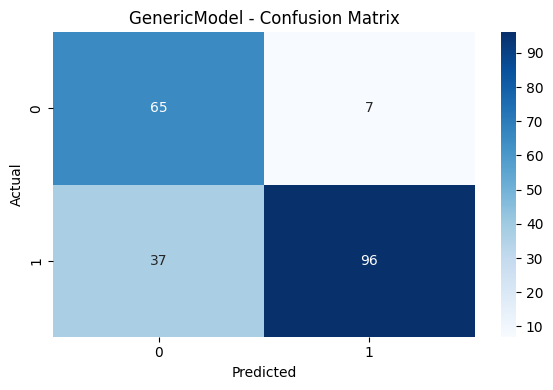

2025-06-11 05:47:30,033 - INFO - Evaluation - GenericModel
2025-06-11 05:47:30,034 - INFO - type: Classifier
2025-06-11 05:47:30,035 - INFO - accuracy: 0.7853658536585366
2025-06-11 05:47:30,036 - INFO - precision: 0.8285049658035131
2025-06-11 05:47:30,037 - INFO - recall: 0.7853658536585366
2025-06-11 05:47:30,038 - INFO - f1_score: 0.7902267964818748
2025-06-11 05:47:30,039 - INFO - mean_squared_error: 0.2146341463414634
2025-06-11 05:47:30,041 - INFO - mean_absolute_error: 0.2146341463414634
2025-06-11 05:47:30,042 - INFO - classification_report:               precision    recall  f1-score   support

           0       0.64      0.90      0.75        72
           1       0.93      0.72      0.81       133

    accuracy                           0.79       205
   macro avg       0.78      0.81      0.78       205
weighted avg       0.83      0.79      0.79       205



In [16]:
result = base_controller.evaluate_model(y_pred, y_test,XGBClassifier(  n_estimators=100,
    max_depth=20,
    learning_rate=0.8,
    eval_metric='logloss',
    random_state=42),confusion_matrix_plot=True)

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.64      0.75       102
           1       0.72      0.93      0.81       103

    accuracy                           0.79       205
   macro avg       0.81      0.78      0.78       205
weighted avg       0.81      0.79      0.78       205



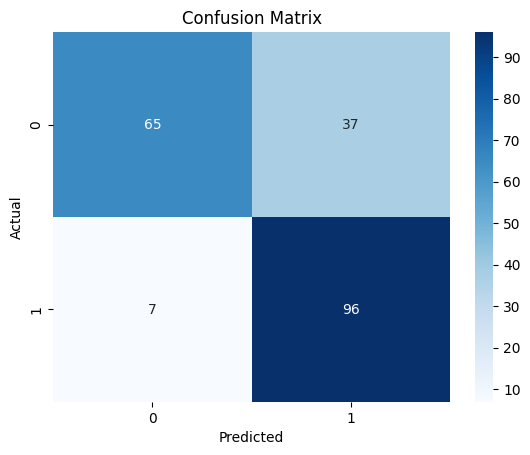

In [17]:
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()